`imports`

In [1]:
import os
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import json
import topojson
import pandas as pd # data processing (CSV file - e.g. pd.read_csv)
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (50, 30)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
#Loading my data (excel spreadsheet)
if os.path.isfile("ghg_data.csv"):
    filepath = "ghg_data.csv"
    print("Loading from file")
else:
    filepath = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1087005/uk-local-authority-ghg-emissions-2020-dataset.csv"
    print("loading from the internet")

gd = pd.read_csv(filepath)
print("'Greenhouse Gas Emissions dataset, loaded")

Loading from file
'Greenhouse Gas Emissions dataset, loaded


In [6]:
for var in gd:
    print(f'{var}: {gd[var].isnull().sum()}')

Country: 0
Country Code: 355
Region: 0
Region Code: 355
Second Tier Authority: 355
Local Authority: 0
Local Authority Code: 0
Calendar Year: 0
LA GHG Sector: 0
LA GHG Sub-sector: 0
Greenhouse gas: 0
Territorial emissions (kt CO2e): 0
CO2 emissions within the scope of influence of LAs (kt CO2e): 0
Mid-year Population (thousands): 0
Area (km2): 0


DATA TRENDS AND EMISSIONS:

In [13]:
gd.plot.bar(x="Greenhouse gas", y="Visits", rot=70, title="Number of tourist visits - Year 2018");


KeyError: 'Visits'

<AxesSubplot:xlabel='Greenhouse gas'>

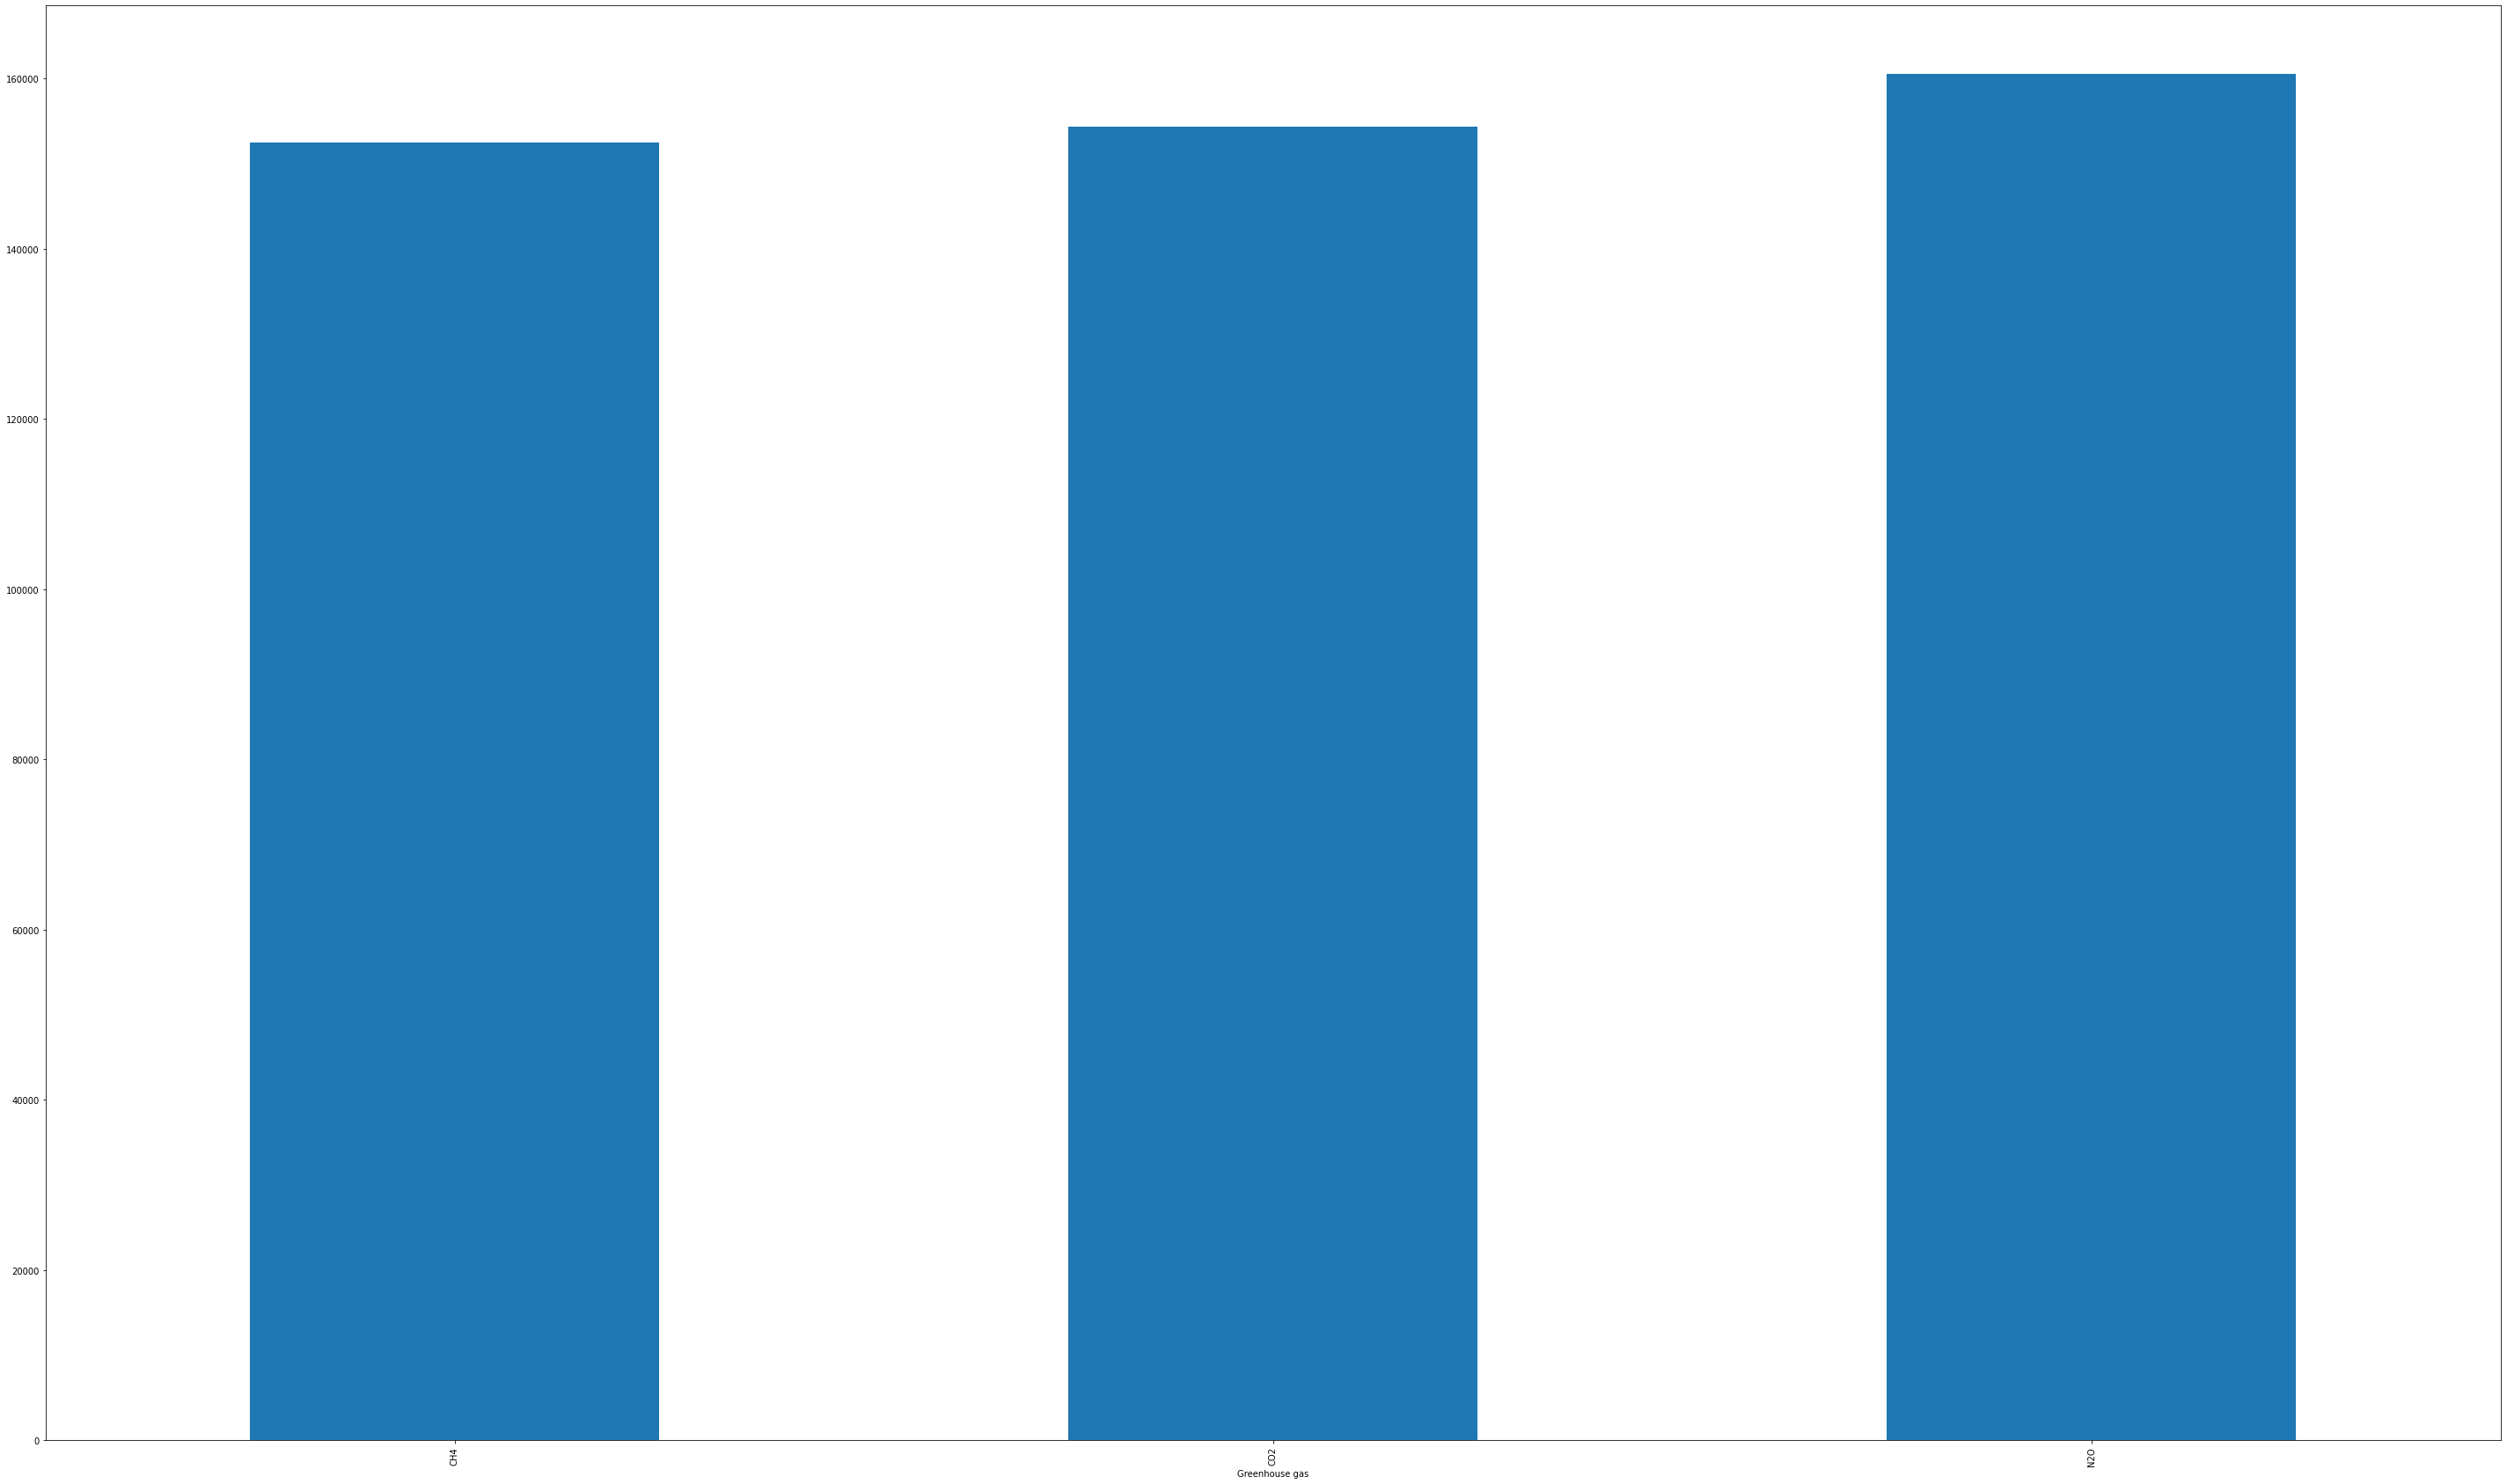

In [8]:
gd.groupby(['Greenhouse gas']).size().plot(kind='bar', stacked=False)

<AxesSubplot:>

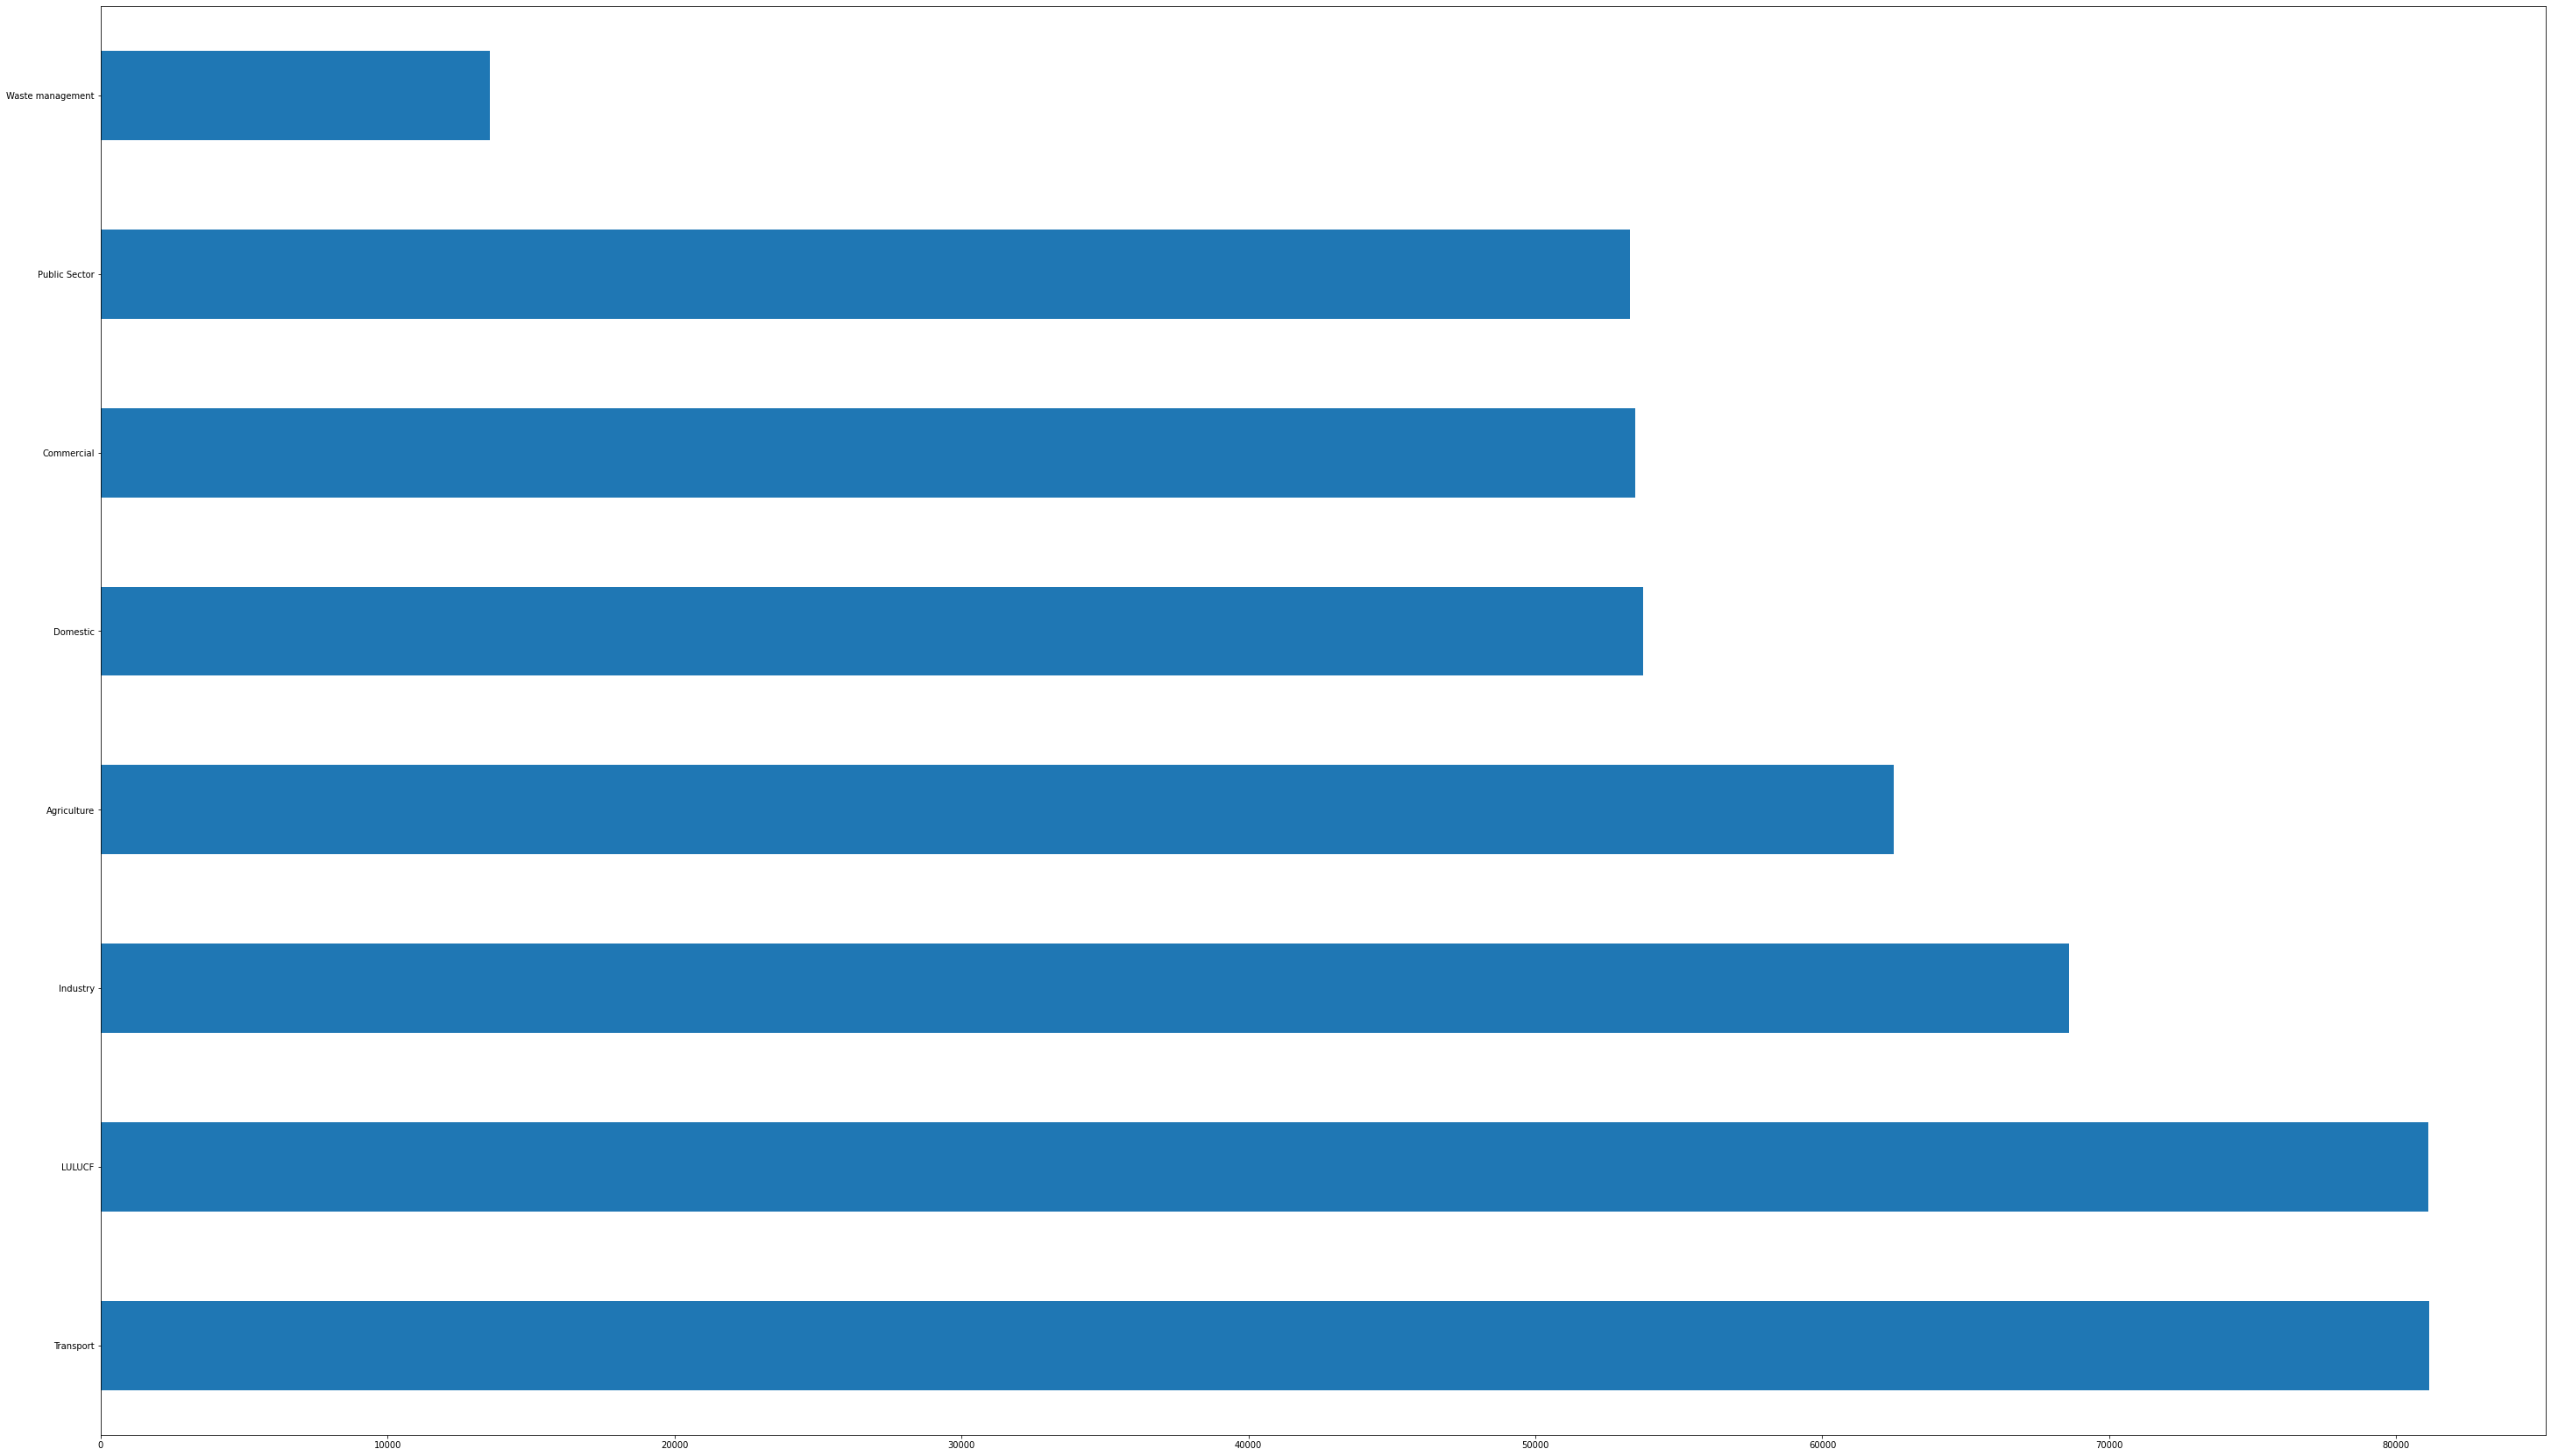

In [8]:
xx = gd['LA GHG Sector'].value_counts()
xx.plot(kind='barh')

In [7]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [21]:
xe=gd

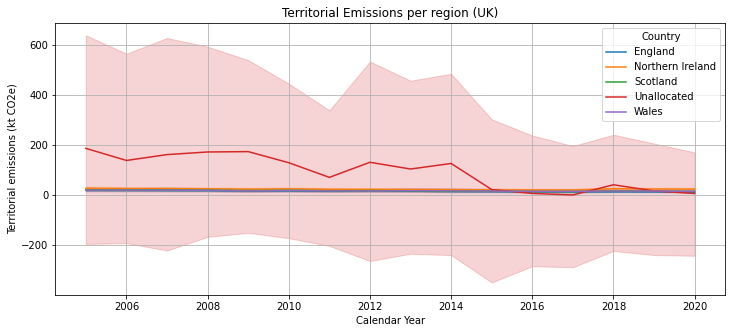

In [23]:
xe=gd
fig= plt.figure(figsize=(12,5))
sns.lineplot(x='Calendar Year',y='Territorial emissions (kt CO2e)', hue='Country',data=xe)
plt.title('Territorial Emissions per region (UK)')
plt.grid()
plt.show()

<AxesSubplot:>

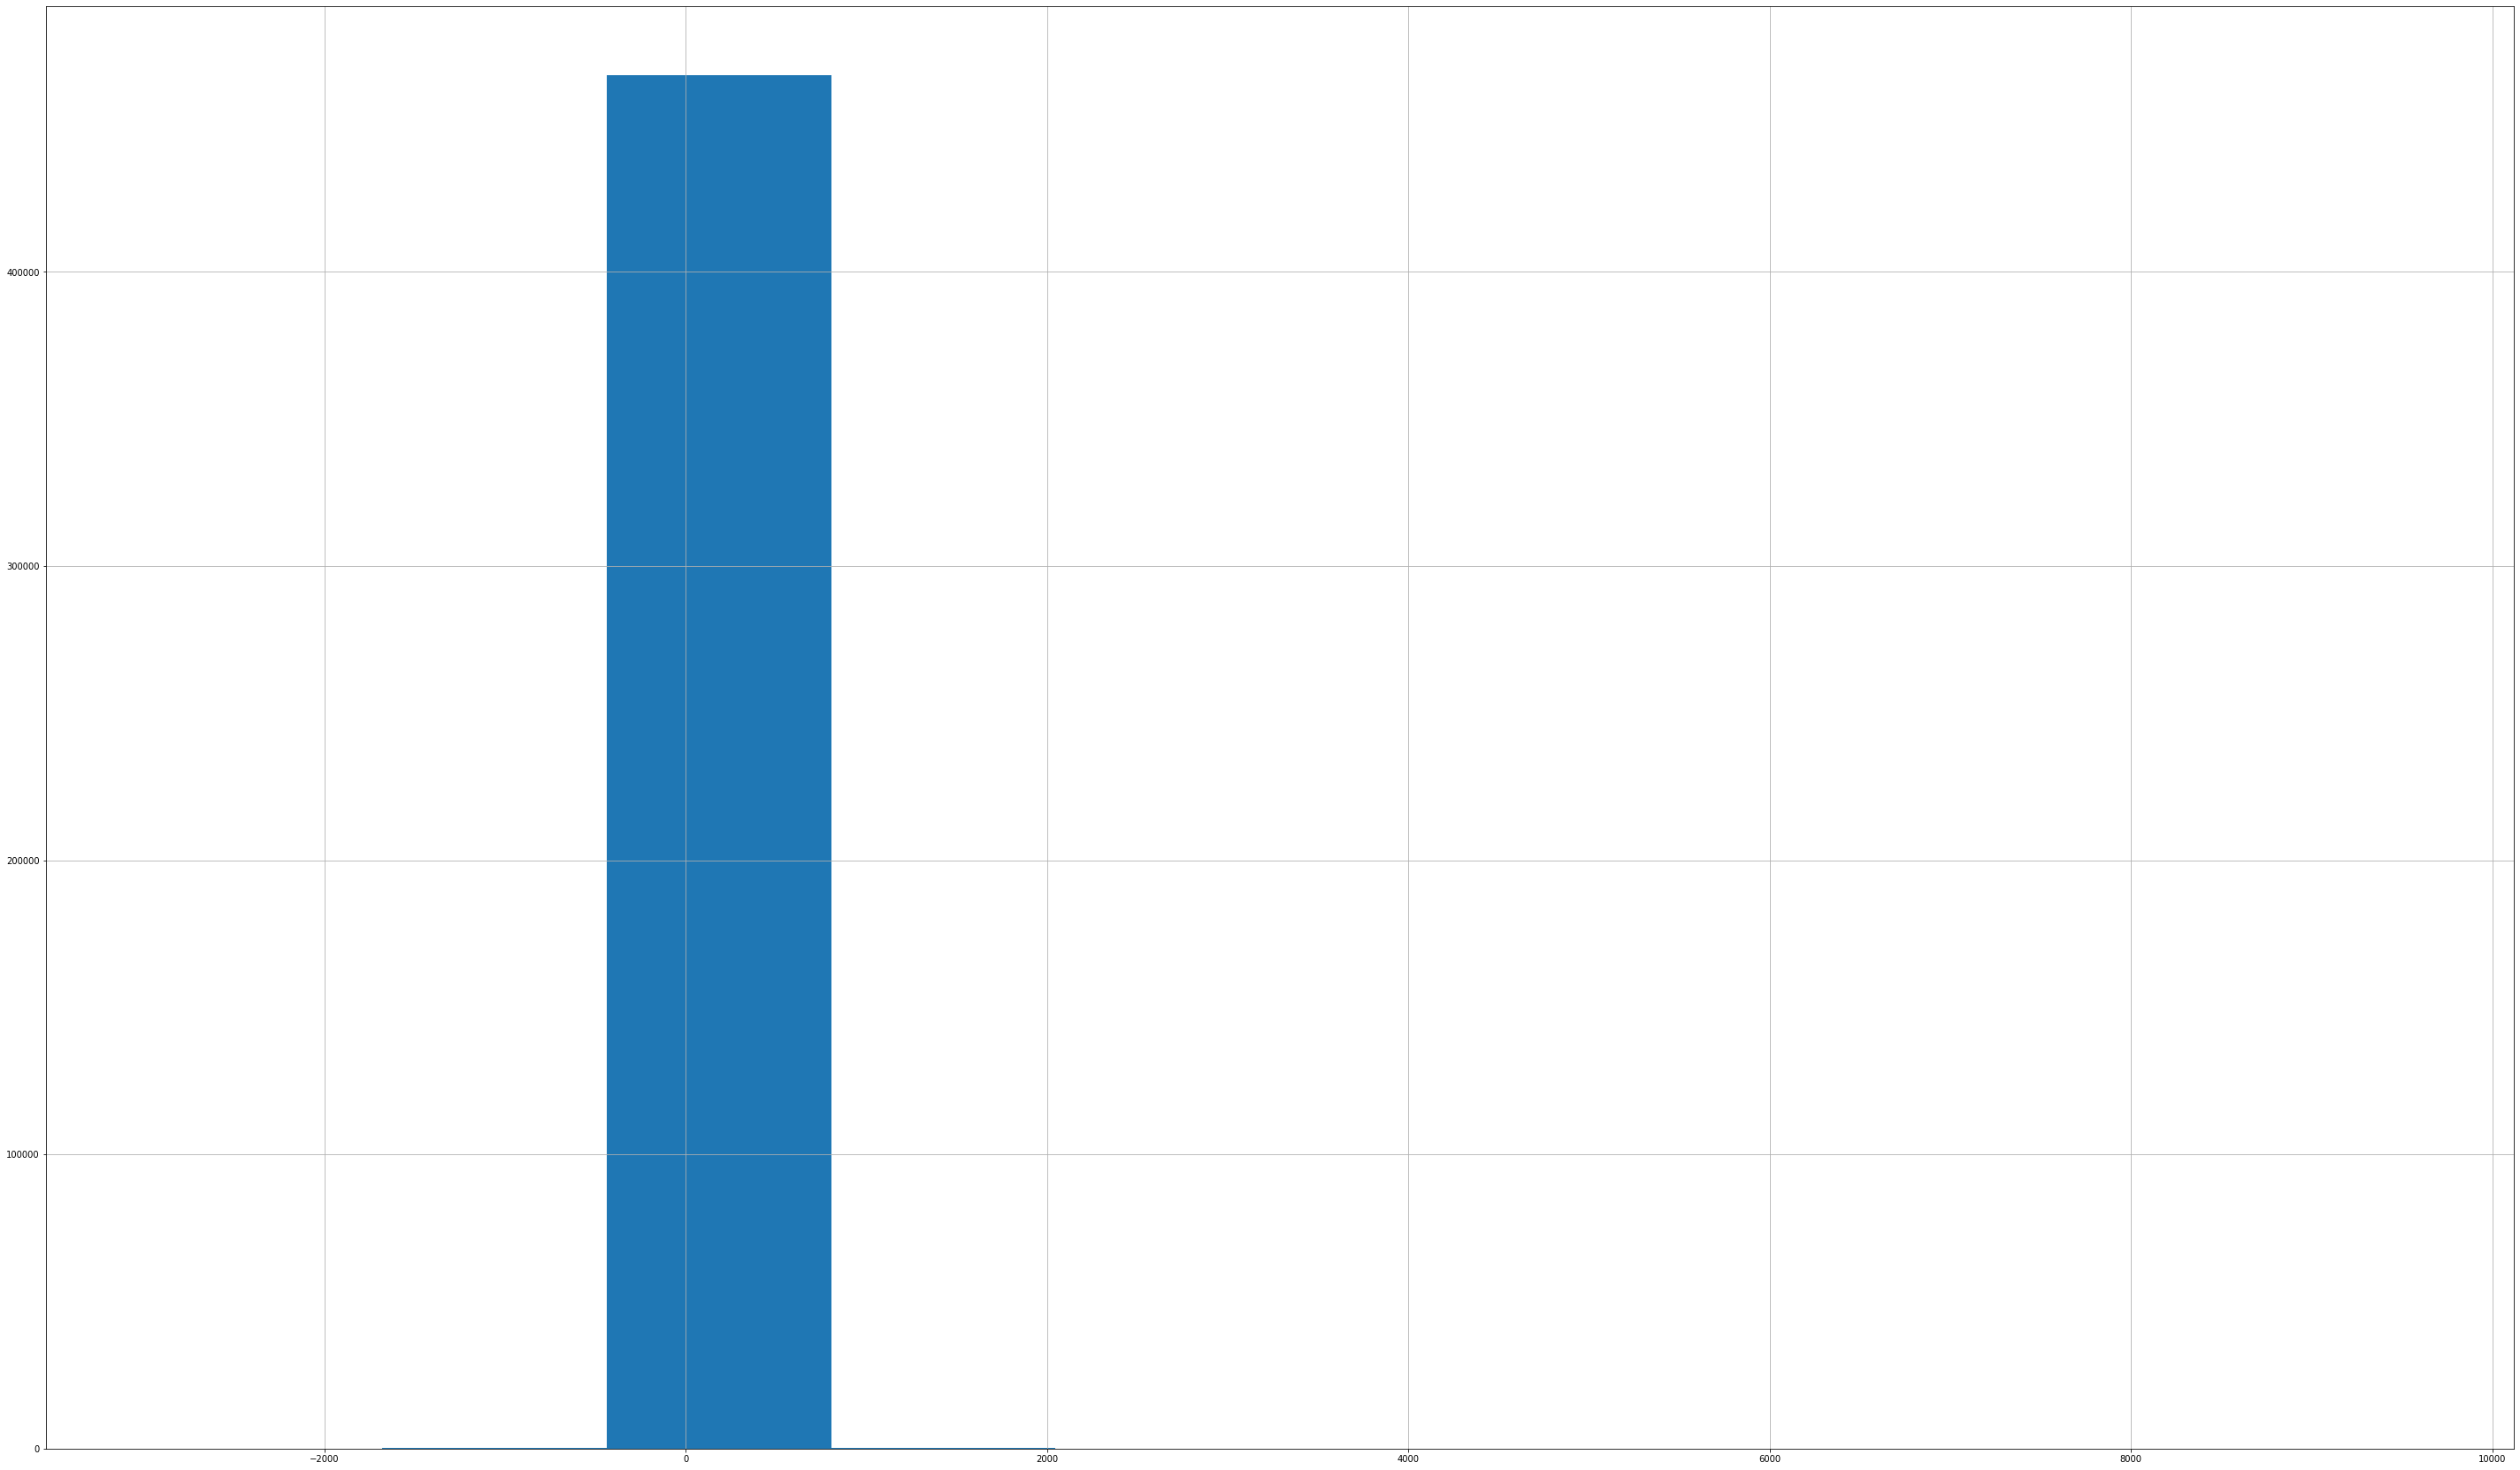

In [24]:
gd['Territorial emissions (kt CO2e)'].hist()

In [9]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

<AxesSubplot:xlabel='LA GHG Sector'>

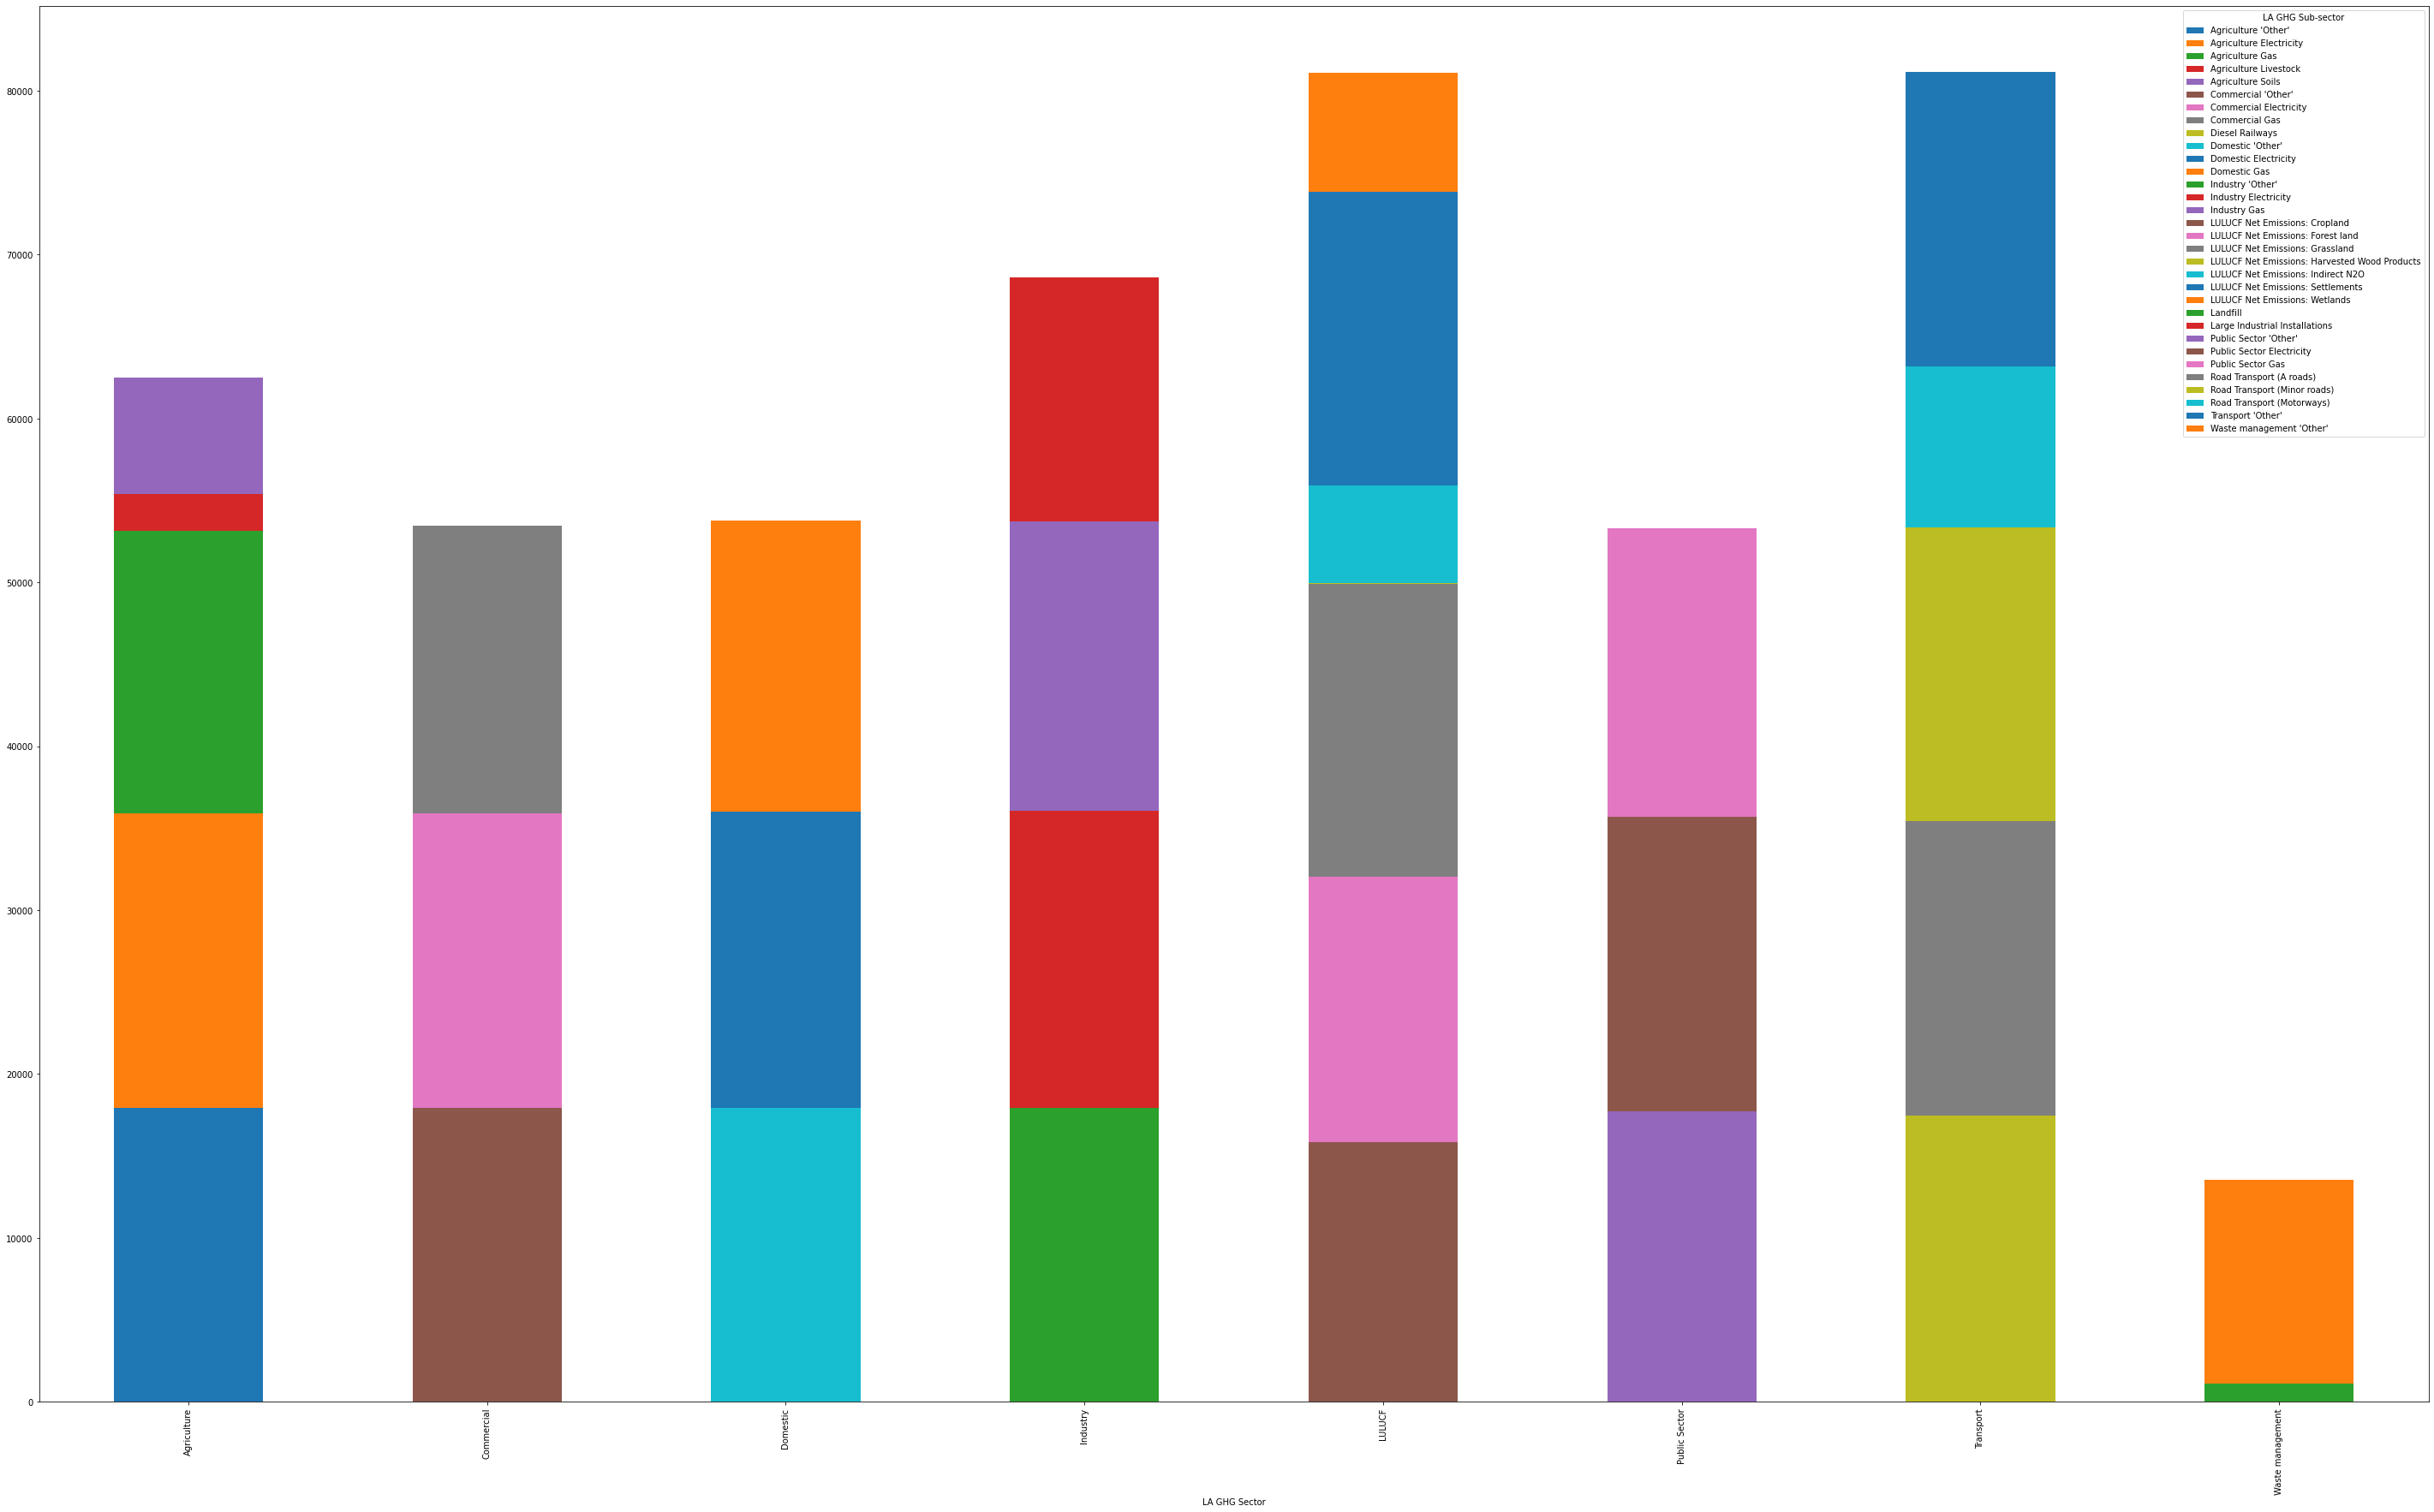

In [12]:
gd.groupby(['LA GHG Sector', 'LA GHG Sub-sector']).size().unstack().plot(kind='bar', stacked=True)

In [14]:
gd.dtypes

Country                                                          object
Country Code                                                     object
Region                                                           object
Region Code                                                      object
Second Tier Authority                                            object
Local Authority                                                  object
Local Authority Code                                             object
Calendar Year                                                     int64
LA GHG Sector                                                    object
LA GHG Sub-sector                                                object
Greenhouse gas                                                   object
Territorial emissions (kt CO2e)                                 float64
CO2 emissions within the scope of influence of LAs (kt CO2e)    float64
Mid-year Population (thousands)                                 

In [69]:
v= gd['LA GHG Sector'].value_counts()

In [72]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

In [ ]:
gd.plot.scatter(x='population', y='median_income', figsize=(8,6))
plt.show()

In [78]:
midpop= gd.groupby('Calendar Year')['Mid-year Population (thousands)'].count()

In [81]:
dfi=gd['LA GHG Sector'].value_counts()


<AxesSubplot:>

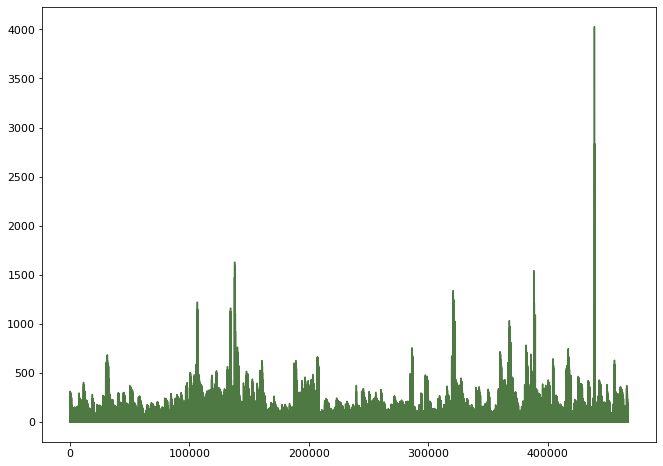

In [85]:
gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].plot(color='#4F7942', figsize=(11,8), fontsize=11, zorder=2)

<AxesSubplot:>

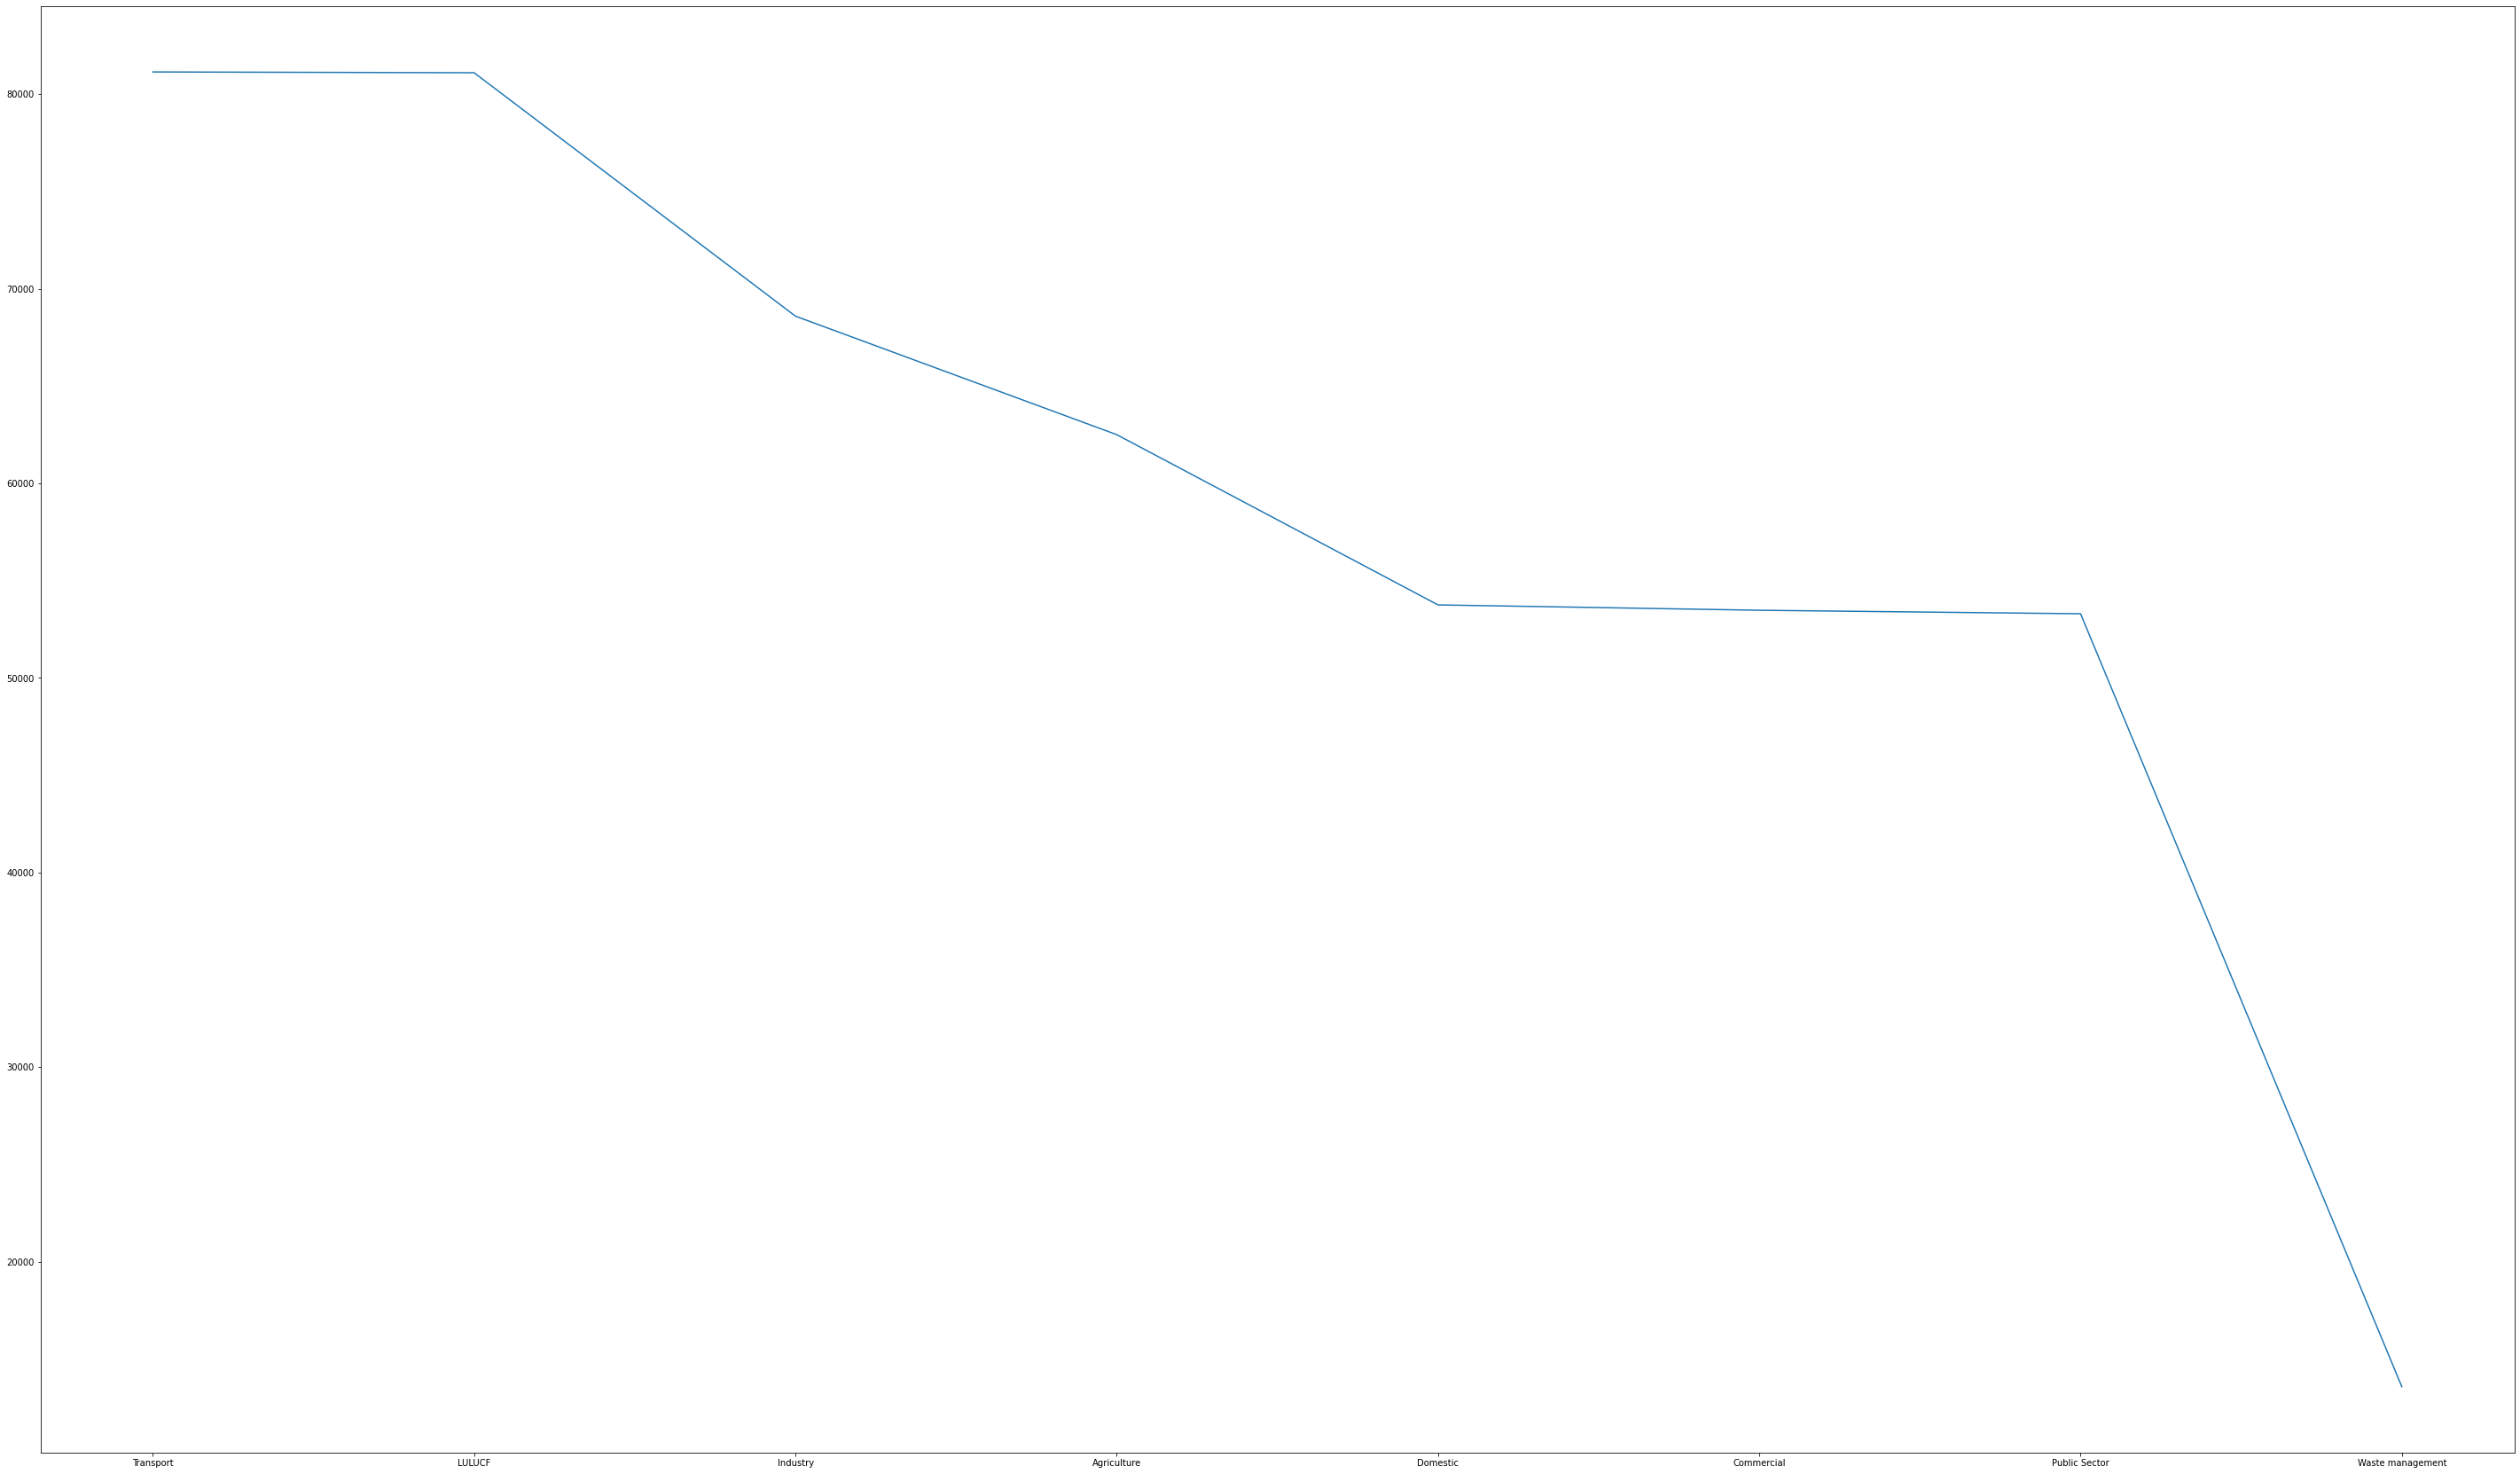

In [82]:
dfi.plot()

In [ ]:
xe = 
ye = gd['LA GHG Sector']

fuels = gd.groupby('LA GHG Sector')
fig, ax = plt.subplots(figsize=(20,9))
for desc, group in fuels:
    group.plot(x=xe, y='Value', label=desc, ax=ax, title='Carbon Emissions per Fuel')
    group.plot(x=ye, y='Value', title=desc)
#fuels.plot(x='YYYYMM', y='Value')

In [ ]:
agg = gd.iloc[:, 1:]
agg = agg.set_index('CO2 emissions within the scope of influence of LAs (kt CO2e)')
agg = agg.groupby(['Description', pd.TimeGrouper('A')])['Value'].sum()
fig2, ax2 = plt.subplots(figsize=(20,9))
agg.unstack(level=0).plot(kind='bar', ax=ax2)
    